## Importing libraries  

In [77]:
import warnings 
warnings.simplefilter(action = "ignore", category = FutureWarning) # this ignores future warnings
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import OneHotEncoder

#Regression librarie 

import seaborn as sns
import matplotlib.pyplot as pl
import matplotlib.ticker as mticker
import plotly.express as px 
from glob import glob # muliplew file handling 
from category_encoders import OneHotEncoder # for categorical features
# interactive dash 

#from ipykernel import Dropdown, fl
from sklearn.impute import SimpleImputer # for dealing with missing values
from sklearn.linear_model import LinearRegression,Ridge # model 
from sklearn.ensemble import RandomForestRegressor # second model
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.pipeline import make_pipeline

# Disable the SettingWithCopyWarning
pd.options.mode.chained_assignment =None # Default warn




## Loading data

In [42]:
data_df = pd.read_csv('Data/buenos-aires-real-estate-1.csv')
data_df

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
1,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,NaN,250000.0,USD,3790600.0,250000.0,117.0,120.0,2136.752137,2083.333333,NaN,4.0,NaN,http://ramos-mejia.properati.com.ar/s7pd_venta...
2,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,"-34.6497002,-58.658073",410000.0,USD,6216584.0,410000.0,410.0,220.0,1000.000000,1863.636364,NaN,NaN,NaN,http://castelar-moron.properati.com.ar/11vgn_v...
3,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,"-34.5957086,-58.5669503",180000.0,USD,2729232.0,180000.0,200.0,135.0,900.000000,1333.333333,NaN,5.0,NaN,http://tres-de-febrero.properati.com.ar/7f7u_v...
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8601,sell,apartment,|Argentina|Capital Federal|San Nicolás|,"-34.601455,-58.378132",125000.0,USD,1895300.0,125000.0,NaN,70.0,NaN,1785.714286,2.0,3.0,NaN,http://san-nicolas.properati.com.ar/1004t_vent...
8602,sell,house,|Argentina|Bs.As. G.B.A. Zona Norte|San Fernando|,NaN,480000.0,USD,7277952.0,480000.0,683.0,235.0,702.781845,2042.553191,NaN,NaN,NaN,http://san-fernando-bs-as-g-b-a-zona-norte.pro...
8603,sell,house,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,NaN,510000.0,USD,7732824.0,510000.0,0.0,256.0,NaN,1992.187500,NaN,NaN,NaN,http://nordelta.properati.com.ar/zg3s_venta_ca...
8604,sell,apartment,|Argentina|Capital Federal|Boedo|,NaN,78000.0,USD,1182667.2,78000.0,52.0,52.0,1500.000000,1500.000000,NaN,NaN,NaN,http://boedo.properati.com.ar/eh9b_venta_depar...


Findo info on data

In [44]:
data_df.info()
data_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8606 entries, 0 to 8605
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   8606 non-null   object 
 1   property_type               8606 non-null   object 
 2   place_with_parent_names     8606 non-null   object 
 3   lat-lon                     6936 non-null   object 
 4   price                       7590 non-null   float64
 5   currency                    7590 non-null   object 
 6   price_aprox_local_currency  7590 non-null   float64
 7   price_aprox_usd             7590 non-null   float64
 8   surface_total_in_m2         5946 non-null   float64
 9   surface_covered_in_m2       7268 non-null   float64
 10  price_usd_per_m2            4895 non-null   float64
 11  price_per_m2                6520 non-null   float64
 12  floor                       1259 non-null   float64
 13  rooms                       4752 

(8606, 16)

Find irrelevaent feature

In [45]:
df = data_df.drop(columns=["properati_url"], inplace= False)

print(F"Data has {df.shape[0]} rows and {df.shape[1]} columns")

Data has 8606 rows and 15 columns


Missing values 

In [46]:
missing_values = (data_df.isnull().sum()/len(data_df)*100).astype(int)

print(F"Column \t\t\t %")
print("."*30)
missing_values

Column 			 %
..............................


operation                      0
property_type                  0
place_with_parent_names        0
lat-lon                       19
price                         11
currency                      11
price_aprox_local_currency    11
price_aprox_usd               11
surface_total_in_m2           30
surface_covered_in_m2         15
price_usd_per_m2              43
price_per_m2                  24
floor                         85
rooms                         44
expenses                      89
properati_url                  0
dtype: int32

## Data Cleaning 

Pandas

In [47]:
Price_Features  =["price","price_usd_per_m2","price_per_m2","price_aprox_usd"]
price_df = df[Price_Features]
price_df

,price,price_usd_per_m2,price_per_m2,price_aprox_usd
0,180000.0,1500.000000,1636.363636,180000.0
1,250000.0,2136.752137,2083.333333,250000.0
2,410000.0,1000.000000,1863.636364,410000.0
3,180000.0,900.000000,1333.333333,180000.0
4,129000.0,1697.368421,1842.857143,129000.0
...,...,...,...,...
8601,125000.0,NaN,1785.714286,125000.0
8602,480000.0,702.781845,2042.553191,480000.0
8603,510000.0,NaN,1992.187500,510000.0
8604,78000.0,1500.000000,1500.000000,78000.0


uses .fillna() fo fill in missing values

In [48]:
for col in price_df.columns:
   
    price_df[col].fillna(
         # select coiumn 
        price_df[col]
        #drop empty column
        .dropna()
        # culculate mean
        .mean()
    )
price_df.info()

price_df
 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8606 entries, 0 to 8605
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             7590 non-null   float64
 1   price_usd_per_m2  4895 non-null   float64
 2   price_per_m2      6520 non-null   float64
 3   price_aprox_usd   7590 non-null   float64
dtypes: float64(4)
memory usage: 269.1 KB


,price,price_usd_per_m2,price_per_m2,price_aprox_usd
0,180000.0,1500.000000,1636.363636,180000.0
1,250000.0,2136.752137,2083.333333,250000.0
2,410000.0,1000.000000,1863.636364,410000.0
3,180000.0,900.000000,1333.333333,180000.0
4,129000.0,1697.368421,1842.857143,129000.0
...,...,...,...,...
8601,125000.0,NaN,1785.714286,125000.0
8602,480000.0,702.781845,2042.553191,480000.0
8603,510000.0,NaN,1992.187500,510000.0
8604,78000.0,1500.000000,1500.000000,78000.0


Sickit learn

In [49]:
area_features = ['surface_total_in_m2', 'surface_covered_in_m2']
area_df = df[area_features]
area_df

,surface_total_in_m2,surface_covered_in_m2
0,120.0,110.0
1,117.0,120.0
2,410.0,220.0
3,200.0,135.0
4,76.0,70.0
...,...,...
8601,NaN,70.0
8602,683.0,235.0
8603,0.0,256.0
8604,52.0,52.0


In [50]:
from sklearn.impute import SimpleImputer
for col in area_df.columns:
    imp_num = SimpleImputer(strategy="mean")
    area_df = pd.DataFrame (
        imp_num.fit_transform(area_df),
        columns= area_df.columns
    )
    
area_df

,surface_total_in_m2,surface_covered_in_m2
0,120.000000,110.0
1,117.000000,120.0
2,410.000000,220.0
3,200.000000,135.0
4,76.000000,70.0
...,...,...
8601,252.829129,70.0
8602,683.000000,235.0
8603,0.000000,256.0
8604,52.000000,52.0


Handling duplicates 

checking for duplicates 

In [51]:
data_df.duplicated().value_counts()

False    8606
Name: count, dtype: int64

Handling outliers 

visulation

In [53]:
import plotly.express as plx
import matplotlib as px

fig = plx.box(
    data_frame= price_df,
    x="price_aprox_usd",
    orientation="h",
    title='Boxplo/t of the Target (price_aprox_usd) - With Outliers'
)

fig.update_layout(xaxis_title = "Target")
fig.show()

Removing outliers

In [54]:
price_df[price_df["price_aprox_usd"]<300000]

,price,price_usd_per_m2,price_per_m2,price_aprox_usd
0,180000.0,1500.000000,1636.363636,180000.0
1,250000.0,2136.752137,2083.333333,250000.0
3,180000.0,900.000000,1333.333333,180000.0
4,129000.0,1697.368421,1842.857143,129000.0
5,120000.0,666.666667,666.666667,120000.0
...,...,...,...,...
8598,85000.0,3148.148148,3148.148148,85000.0
8600,190000.0,365.384615,1652.173913,190000.0
8601,125000.0,NaN,1785.714286,125000.0
8604,78000.0,1500.000000,1500.000000,78000.0


In [55]:
mask_price = data_df["price_aprox_usd"] < 300000

fig = plx.box(
    data_frame= data_df[mask_price],
    x = "price_aprox_usd",
    orientation= "h",
    title='Boxplo/t of the Target (price_aprox_usd) - With out Outliers'
    
)

fig.update_layout(xaxis_title = "Target")
fig.show()

## Data Transformatuion

The data frame here has no categorical data to encode but here are examples 

We will use One-hot encodinmg and label encoding categorical data

In [56]:
cat_num_df = pd.DataFrame({
    'Fruit': ['Apple', 'Orange', 'Mango', 'Apple', 'Orange'],
    'Quantity': [10, 15, 20, 8, 13],
    'Price': [150, 300, 135, 150, 300]
})
cat_num_df

,Fruit,Quantity,Price
0,Apple,10,150
1,Orange,15,300
2,Mango,20,135
3,Apple,8,150
4,Orange,13,300


Encoded get dummies 

In [57]:
Encoded_getDummies = pd.get_dummies(
    cat_num_df,
    columns = ["Fruit"],
    dtype=int

)

Encoded_getDummies

,Quantity,Price,Fruit_Apple,Fruit_Mango,Fruit_Orange
0,10,150,1,0,0
1,15,300,0,0,1
2,20,135,0,1,0
3,8,150,1,0,0
4,13,300,0,0,1


One hot encoder

In [58]:
from category_encoders import OneHotEncoder
ohe = OneHotEncoder(use_cat_names=True , cols =["Fruit"])
encoded_ohe_df = ohe.fit_transform(cat_num_df)

encoded_ohe_df

,Fruit_Apple,Fruit_Orange,Fruit_Mango,Quantity,Price
0,1,0,0,10,150
1,0,1,0,15,300
2,0,0,1,20,135
3,1,0,0,8,150
4,0,1,0,13,300


# Part-2 Regression

In [59]:
data_df.info()
data_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8606 entries, 0 to 8605
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   8606 non-null   object 
 1   property_type               8606 non-null   object 
 2   place_with_parent_names     8606 non-null   object 
 3   lat-lon                     6936 non-null   object 
 4   price                       7590 non-null   float64
 5   currency                    7590 non-null   object 
 6   price_aprox_local_currency  7590 non-null   float64
 7   price_aprox_usd             7590 non-null   float64
 8   surface_total_in_m2         5946 non-null   float64
 9   surface_covered_in_m2       7268 non-null   float64
 10  price_usd_per_m2            4895 non-null   float64
 11  price_per_m2                6520 non-null   float64
 12  floor                       1259 non-null   float64
 13  rooms                       4752 

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
1,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,NaN,250000.0,USD,3790600.0,250000.0,117.0,120.0,2136.752137,2083.333333,NaN,4.0,NaN,http://ramos-mejia.properati.com.ar/s7pd_venta...
2,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,"-34.6497002,-58.658073",410000.0,USD,6216584.0,410000.0,410.0,220.0,1000.000000,1863.636364,NaN,NaN,NaN,http://castelar-moron.properati.com.ar/11vgn_v...
3,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,"-34.5957086,-58.5669503",180000.0,USD,2729232.0,180000.0,200.0,135.0,900.000000,1333.333333,NaN,5.0,NaN,http://tres-de-febrero.properati.com.ar/7f7u_v...
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...


## Excploritory data analysis

### 1. Taget variable

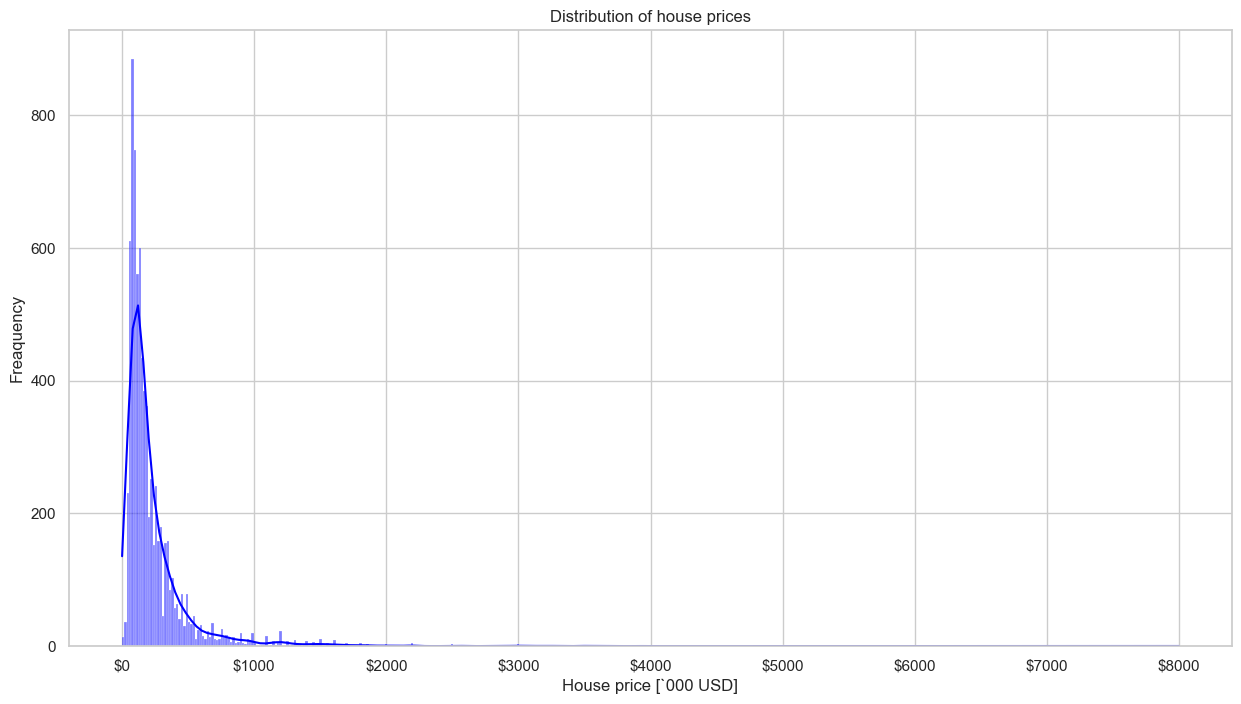

In [60]:
# DataCreateing distributoion plousin seaborn 

sns.set(style = "whitegrid")
pl.figure(figsize =(15,8))
sns.histplot(data_df["price_aprox_usd"],  kde= True , color="blue")

# Labels and title 
pl.xlabel("House price [`000 USD]")
pl.ylabel("Freaquency")
pl.title("Distribution of house prices")

# Formattinbg x-axis latels to show in $100,000

def price_formatter(x,pos):
    return f"${int(x/1000):}"
ax = pl.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(price_formatter))

pl.show()

Find maxximum pice 

In [61]:
max_price = max(data_df.price_aprox_usd)
print(f"The highest priced house costs ${max_price:.2f}")

The highest priced house costs $8000000.00


Mask filtering area = Capitel federal , house , <300000 USD

In [21]:
Mask_cap = data_df["place_with_parent_names"].str.contains("Capital Federal")
mask_type = data_df["property_type"] == "house"
mask_price = data_df["price_aprox_usd"] < 300_000

df2 = data_df[Mask_cap & mask_type & mask_price]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, 184 to 8600
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   78 non-null     object 
 1   property_type               78 non-null     object 
 2   place_with_parent_names     78 non-null     object 
 3   lat-lon                     76 non-null     object 
 4   price                       78 non-null     float64
 5   currency                    78 non-null     object 
 6   price_aprox_local_currency  78 non-null     float64
 7   price_aprox_usd             78 non-null     float64
 8   surface_total_in_m2         51 non-null     float64
 9   surface_covered_in_m2       65 non-null     float64
 10  price_usd_per_m2            48 non-null     float64
 11  price_per_m2                65 non-null     float64
 12  floor                       1 non-null      float64
 13  rooms                       43 non-nul

Removing outliers 

Text(0.5, 1.0, 'surface areea covered by buildings')

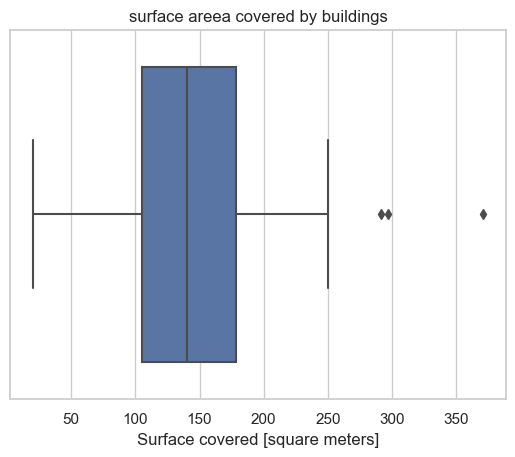

In [62]:
sns.boxplot(df2, x ="surface_covered_in_m2", orient= "h")
pl.xlabel("Surface covered [square meters]")
pl.title("surface areea covered by buildings")

In [63]:
# rmove outliers 

low, high = df2["surface_covered_in_m2"].quantile([0.1,0.9])

#Quartile based subset
mask_area = df2["surface_covered_in_m2"].between(low,high)
df3 =df2[mask_area]
df3.head(4)

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
184,sell,house,|Argentina|Capital Federal|Flores|,"-34.6374837,-58.4601452",239000.0,USD,3623813.6,239000.0,150.0,144.0,1593.333333,1659.722222,NaN,NaN,NaN,http://flores.properati.com.ar/12pgl_venta_cas...
195,sell,house,|Argentina|Capital Federal|Boca|,"-34.628398,-58.3619026",240000.0,USD,3638976.0,240000.0,146.0,135.0,1643.835616,1777.777778,NaN,5.0,NaN,http://boca.properati.com.ar/10t85_venta_casa_...
439,sell,house,|Argentina|Capital Federal|Villa Lugano|,"-34.6632794,-58.4795435",250000.0,USD,3790600.0,250000.0,230.0,190.0,1086.956522,1315.789474,NaN,4.0,NaN,http://villa-lugano.properati.com.ar/yd6n_vent...
590,sell,house,|Argentina|Capital Federal|Coghlan|,"-34.5603249,-58.4709941",270000.0,USD,4093848.0,270000.0,249.0,164.0,1084.337349,1646.341463,NaN,5.0,NaN,http://coghlan.properati.com.ar/105vq_venta_ca...


Text(0.5, 1.0, 'surface areea covered by buildings')

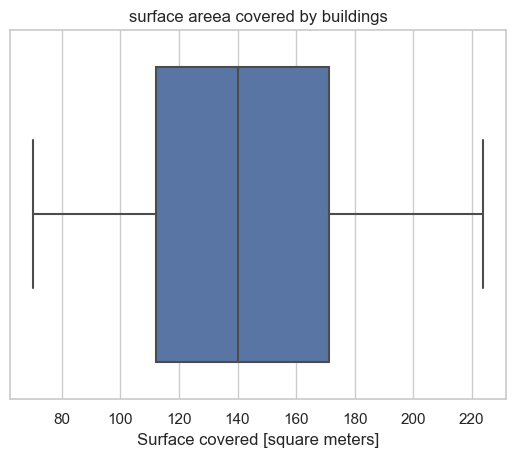

In [64]:
sns.boxplot(df3, x ="surface_covered_in_m2", orient= "h")
pl.xlabel("Surface covered [square meters]")
pl.title("surface areea covered by buildings")

Splitting for feature engineering 

In [65]:
df3[["lat","lon"]] = df3["lat-lon"].str.split(",", expand= True).astype(float)
df3.drop(columns="lat-lon", inplace=True)
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 184 to 8600
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   52 non-null     object 
 1   property_type               52 non-null     object 
 2   place_with_parent_names     52 non-null     object 
 3   price                       52 non-null     float64
 4   currency                    52 non-null     object 
 5   price_aprox_local_currency  52 non-null     float64
 6   price_aprox_usd             52 non-null     float64
 7   surface_total_in_m2         37 non-null     float64
 8   surface_covered_in_m2       52 non-null     float64
 9   price_usd_per_m2            34 non-null     float64
 10  price_per_m2                52 non-null     float64
 11  floor                       0 non-null      float64
 12  rooms                       34 non-null     float64
 13  expenses                    0 non-null

Get place namee 

In [66]:
df3["neighborhood"] = df3["place_with_parent_names"].str.split("|", expand=True)[3]
df3.drop(columns="place_with_parent_names", inplace=True)
df3.head()

,operation,property_type,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,lat,lon,neighborhood
184,sell,house,239000.0,USD,3623813.6,239000.0,150.0,144.0,1593.333333,1659.722222,NaN,NaN,NaN,http://flores.properati.com.ar/12pgl_venta_cas...,-34.637484,-58.460145,Flores
195,sell,house,240000.0,USD,3638976.0,240000.0,146.0,135.0,1643.835616,1777.777778,NaN,5.0,NaN,http://boca.properati.com.ar/10t85_venta_casa_...,-34.628398,-58.361903,Boca
439,sell,house,250000.0,USD,3790600.0,250000.0,230.0,190.0,1086.956522,1315.789474,NaN,4.0,NaN,http://villa-lugano.properati.com.ar/yd6n_vent...,-34.663279,-58.479543,Villa Lugano
590,sell,house,270000.0,USD,4093848.0,270000.0,249.0,164.0,1084.337349,1646.341463,NaN,5.0,NaN,http://coghlan.properati.com.ar/105vq_venta_ca...,-34.560325,-58.470994,Coghlan
812,sell,house,189000.0,USD,2865693.6,189000.0,113.0,80.0,1672.566372,2362.500000,NaN,NaN,NaN,http://flores.properati.com.ar/1204o_venta_cas...,-34.637556,-58.463511,Flores


See missing values by percentage 

In [67]:
df3.isnull().sum()/len(df3)*100

operation                       0.000000
property_type                   0.000000
price                           0.000000
currency                        0.000000
price_aprox_local_currency      0.000000
price_aprox_usd                 0.000000
surface_total_in_m2            28.846154
surface_covered_in_m2           0.000000
price_usd_per_m2               34.615385
price_per_m2                    0.000000
floor                         100.000000
rooms                          34.615385
expenses                      100.000000
properati_url                   0.000000
lat                             0.000000
lon                             0.000000
neighborhood                    0.000000
dtype: float64

In [68]:
df3.drop(columns=["floor","expenses"], inplace=True)

Featur cardinality

In [69]:
feature_cardinality = df3.select_dtypes("object").nunique()
feature_cardinality

operation         1
property_type     1
currency          1
properati_url    52
neighborhood     24
dtype: int64

DROP THOSE THAT HAVE ONLY THE 1 FEATURE and one that has 2 many features becouse they either add nothing or mess up data

In [70]:
df3.drop(columns=["operation","property_type","currency","properati_url"], inplace=True)

Removing leaky features

In [71]:
df3.head()

,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,lat,lon,neighborhood
184,239000.0,3623813.6,239000.0,150.0,144.0,1593.333333,1659.722222,NaN,-34.637484,-58.460145,Flores
195,240000.0,3638976.0,240000.0,146.0,135.0,1643.835616,1777.777778,5.0,-34.628398,-58.361903,Boca
439,250000.0,3790600.0,250000.0,230.0,190.0,1086.956522,1315.789474,4.0,-34.663279,-58.479543,Villa Lugano
590,270000.0,4093848.0,270000.0,249.0,164.0,1084.337349,1646.341463,5.0,-34.560325,-58.470994,Coghlan
812,189000.0,2865693.6,189000.0,113.0,80.0,1672.566372,2362.500000,NaN,-34.637556,-58.463511,Flores


In [72]:
df3.drop(
    columns=[
        "price",
        "price_aprox_local_currency",
        "price_per_m2",
        "price_usd_per_m2"  
    ], inplace= True
)

df3.head()

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,lat,lon,neighborhood
184,239000.0,150.0,144.0,NaN,-34.637484,-58.460145,Flores
195,240000.0,146.0,135.0,5.0,-34.628398,-58.361903,Boca
439,250000.0,230.0,190.0,4.0,-34.663279,-58.479543,Villa Lugano
590,270000.0,249.0,164.0,5.0,-34.560325,-58.470994,Coghlan
812,189000.0,113.0,80.0,NaN,-34.637556,-58.463511,Flores


7.  High Collinearity

In [73]:
corr_df = df3.select_dtypes("number").corr()
corr_df

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,lat,lon
price_aprox_usd,1.000000,0.037634,0.479536,0.145492,0.117994,-0.016904
surface_total_in_m2,0.037634,1.000000,0.251142,0.127402,0.071780,0.009936
surface_covered_in_m2,0.479536,0.251142,1.000000,0.447277,-0.306525,-0.130012
rooms,0.145492,0.127402,0.447277,1.000000,-0.017564,0.043489
lat,0.117994,0.071780,-0.306525,-0.017564,1.000000,0.154819
lon,-0.016904,0.009936,-0.130012,0.043489,0.154819,1.000000


In [78]:
fig = px.imshow(corr_df,color_continuous_scale="spectral")
fig.update_layout(title ="Heat map : corrolation of feature ", font =dict(size=12))
fig.show()

In [79]:
df3.drop(columns=["surface_covered_in_m2","rooms"], inplace=True)
print(df3.info())
df3.head()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 184 to 8600
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price_aprox_usd      52 non-null     float64
 1   surface_total_in_m2  37 non-null     float64
 2   lat                  52 non-null     float64
 3   lon                  52 non-null     float64
 4   neighborhood         52 non-null     object 
dtypes: float64(4), object(1)
memory usage: 2.4+ KB
None


,price_aprox_usd,surface_total_in_m2,lat,lon,neighborhood
184,239000.0,150.0,-34.637484,-58.460145,Flores
195,240000.0,146.0,-34.628398,-58.361903,Boca
439,250000.0,230.0,-34.663279,-58.479543,Villa Lugano
590,270000.0,249.0,-34.560325,-58.470994,Coghlan
812,189000.0,113.0,-34.637556,-58.463511,Flores


### Glob

In [80]:
files = glob("./data/buenos-aires-real-estate-*.csv")
files

['./data\\buenos-aires-real-estate-1.csv',
 './data\\buenos-aires-real-estate-2.csv',
 './data\\buenos-aires-real-estate-3.csv',
 './data\\buenos-aires-real-estate-4.csv',
 './data\\buenos-aires-real-estate-5.csv']

In [81]:
for file in files:
    print(file)

./data\buenos-aires-real-estate-1.csv
./data\buenos-aires-real-estate-2.csv
./data\buenos-aires-real-estate-3.csv
./data\buenos-aires-real-estate-4.csv
./data\buenos-aires-real-estate-5.csv


In [82]:
dataFrame1 = []
for file in files:
    dataFrame1.append(pd.read_csv(file))

In [83]:
dataframes = [pd.read_csv(file) for file in files]

In [85]:
for i in range(0,5):
    print(type(dataframes[i]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [86]:
data_df = pd.concat(dataframes,ignore_index=True)
print(data_df.info())
data_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43029 entries, 0 to 43028
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   43029 non-null  object 
 1   property_type               43029 non-null  object 
 2   place_with_parent_names     43029 non-null  object 
 3   lat-lon                     34734 non-null  object 
 4   price                       38073 non-null  float64
 5   currency                    38072 non-null  object 
 6   price_aprox_local_currency  38073 non-null  float64
 7   price_aprox_usd             38073 non-null  float64
 8   surface_total_in_m2         29871 non-null  float64
 9   surface_covered_in_m2       36420 non-null  float64
 10  price_usd_per_m2            24449 non-null  float64
 11  price_per_m2                32642 non-null  float64
 12  floor                       6505 non-null   float64
 13  rooms                       238

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
1,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,NaN,250000.0,USD,3790600.0,250000.0,117.0,120.0,2136.752137,2083.333333,NaN,4.0,NaN,http://ramos-mejia.properati.com.ar/s7pd_venta...
2,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,"-34.6497002,-58.658073",410000.0,USD,6216584.0,410000.0,410.0,220.0,1000.000000,1863.636364,NaN,NaN,NaN,http://castelar-moron.properati.com.ar/11vgn_v...
3,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,"-34.5957086,-58.5669503",180000.0,USD,2729232.0,180000.0,200.0,135.0,900.000000,1333.333333,NaN,5.0,NaN,http://tres-de-febrero.properati.com.ar/7f7u_v...
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...


#### save to csv

In [87]:
data_df.to_csv("./data/joined_data.csv")

### Create prepair data function

In [154]:
def prepair_data(path):
    #red file path
    file_path = glob(path)
    
    #list and compare files in path
    data_framees = [pd.read_csv(file) for file in file_path]

    # Concat dataframes
    df = pd.concat(data_framees)

    # Subset data: apartment in "Capital Federal", less than 400,000
    mask_cap =df["place_with_parent_names"].str.contains("Capital Federal")
    mask_building = df["property_type"] == "apartment"
    mask_price = df["price_aprox_usd"] <400_000 #target

    # filter dataset
    df = df[mask_cap & mask_building & mask_price]

    # Subset data: Remove outliers for "surface_covered_in_m2"

    low , high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
    mask_areas = df["surface_covered_in_m2"].between(low,high)
    df = df[mask_areas]

    #Split lat-lon 
    df[["lat","lon"]] = df["lat-lon"].str.split(",", expand=True).astype(float)
    df.drop(columns="lat-lon", inplace=True)
    
    # get place neme 
    df["neighbourhood"] = df["place_with_parent_names"].str.split("|",expand=True)[3]
    df.drop(columns="place_with_parent_names", inplace = True)

    # Drop high null columns
    df.drop(columns= ["floor","expenses"], inplace = True)

    # drop low and high cardinality
    df.drop(columns= ["property_type","operation","currency","properati_url"], inplace=True)

    #drop leaky features
    df.drop(
    columns=[
        "price",
        "price_aprox_local_currency",
        "price_per_m2",
        "price_usd_per_m2"  
    ], 
    inplace= True
    )
    # Drop high corrolation
    df.drop(columns=["surface_total_in_m2","rooms"],inplace=True)

    return df





#### Import data using prepaired data

In [155]:
prepped_df= prepair_data("./data/buenos-aires-real-estate-*.csv")
print(prepped_df.info())
prepped_df.to_csv('./data/prepared_df.csv')
prepped_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6507 entries, 4 to 8597
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price_aprox_usd        6507 non-null   float64
 1   surface_covered_in_m2  6507 non-null   float64
 2   lat                    6247 non-null   float64
 3   lon                    6247 non-null   float64
 4   neighbourhood          6507 non-null   object 
dtypes: float64(4), object(1)
memory usage: 305.0+ KB
None


,price_aprox_usd,surface_covered_in_m2,lat,lon,neighbourhood
4,129000.0,70.0,-34.584651,-58.454693,Chacarita
9,87000.0,42.0,-34.638979,-58.500115,Villa Luro
29,118000.0,54.0,-34.615847,-58.459957,Caballito
40,57000.0,42.0,-34.625222,-58.382382,Constitución
41,90000.0,50.0,-34.610610,-58.412511,Once


split

In [157]:
import numpy as np
# seportate features from target
target ="price_aprox_usd"
features = ["lat","lon","surface_covered_in_m2","neighbourhood"]

X=prepped_df[features] #dataframe
y= prepped_df[target] #series

In [118]:
print(y.head())

4     129000.0
9      87000.0
29    118000.0
40     57000.0
41     90000.0
Name: price_aprox_usd, dtype: float64


<Axes: ylabel='Density'>

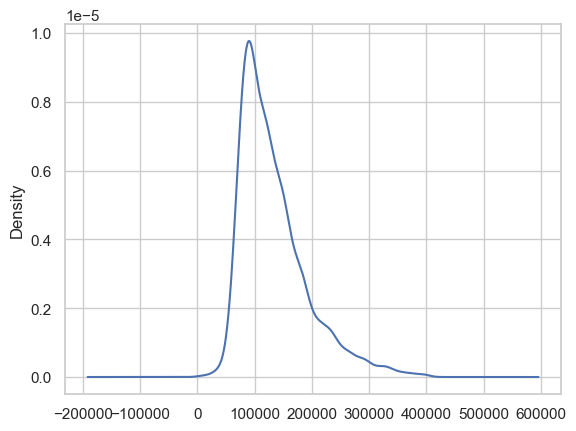

In [119]:
y.plot(kind="kde")

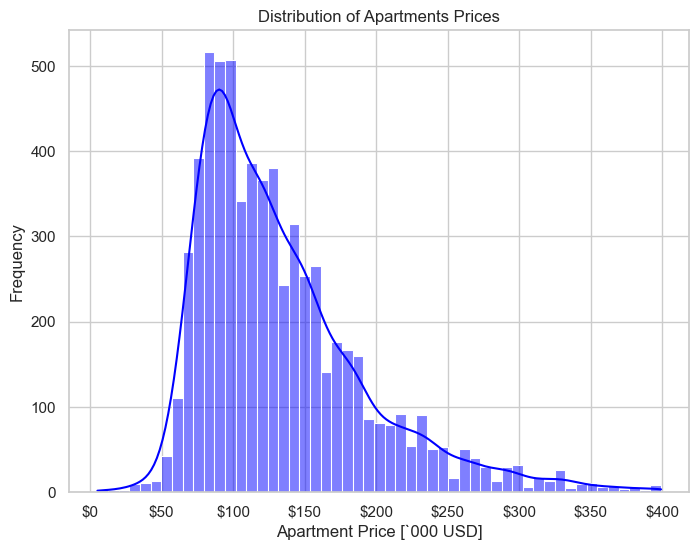

In [158]:
# Create a distribution plot using Seaborn
sns.set(style="whitegrid")
pl.figure(figsize=(8, 6))
sns.histplot(y, kde=True, color="blue")

# Adding labels and title
pl.xlabel("Apartment Price [`000 USD]")
pl.ylabel("Frequency")
pl.title("Distribution of Apartments Prices")

# Format x-axis labels to display prices in "$100,000" format
def price_formatter(x, pos):
    return f"${int(x/1000):,}"

ax = pl.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(price_formatter))

pl.show()

### train test

In [159]:
from sklearn.model_selection import train_test_split

# split into train (80%) and test (20%) sets
x_train ,x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                                                    

# build model

### baseline

In [160]:
y_mean = (y_train.mean())

y_pred_baseline = [y_mean]*len(y_train)

print("Mean appartmenyt price: $",round(y_mean,2))
print("Baseliune MAE:", round(mean_absolute_error(y_train,y_pred_baseline),2))

Mean appartmenyt price: $ 133158.78
Baseliune MAE: 44845.54


Iterate 

In [161]:
model_linear_regression = make_pipeline(

OneHotEncoder(use_cat_names=True),
SimpleImputer(),
LinearRegression()
)

model_linear_regression.fit(x_train,y_train)


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['neighbourhood'], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

### Evaluate

In [162]:
y_pred_training = model_linear_regression.predict(x_train)
y_pred_tEST= model_linear_regression.predict(x_test)

print("Training MAE: ",round(mean_absolute_error(y_train,y_pred_training),2))
print("Testing MAE: ",round(mean_absolute_error(y_test,y_pred_tEST),2))



Training MAE:  24215.29
Testing MAE:  25303.61


Heighet test than train MAE is sign of over fitting thus we must cross validate 

In [163]:
random_forest = make_pipeline(
    OneHotEncoder(use_cat_names= True),
    SimpleImputer(),
    RandomForestRegressor())
random_forest.fit(x_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['neighbourhood'], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('randomforestregressor', RandomForestRegressor())])

In [181]:
y_pred_training = random_forest.predict(x_train)
y_pred_test = random_forest.predict(x_test)

print(f"Training MAE:${round(mean_absolute_error(y_train, y_pred_training),2)}")
print(f"Test data MAE:${round(mean_absolute_error(y_test, y_pred_test),2)}")

Training MAE:$7904.66
Test data MAE:$20799.37


In [165]:
# for cross validation
from sklearn.model_selection import GridSearchCV, cross_val_score

In [166]:
params ={
    "randomforestregressor__n_estimators": range(25,100,25),
    "randomforestregressor__max_depth": range(10,50,10)

}
params

{'randomforestregressor__n_estimators': range(25, 100, 25),
 'randomforestregressor__max_depth': range(10, 50, 10)}

In [167]:
[i for i in range(10, 50, 10)]

[10, 20, 30, 40]

In [168]:
[j for j in range(25, 100, 25)]

[25, 50, 75]

In [169]:
model = GridSearchCV(

    random_forest,
    param_grid=params,
    cv =5,
    n_jobs =-1,
    verbose=1

)

model.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('onehotencoder',
                                        OneHotEncoder(cols=['neighbourhood'],
                                                      use_cat_names=True)),
                                       ('simpleimputer', SimpleImputer()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': range(10, 50, 10),
                         'randomforestregressor__n_estimators': range(25, 100, 25)},
             verbose=1)

In [170]:
cross_val_score(model, x_train, y_train,cv=5,n_jobs=-1)

cv_results = pd.DataFrame(model.cv_results_)

model.best_params_

{'randomforestregressor__max_depth': 30,
 'randomforestregressor__n_estimators': 75}

In [172]:
# Predict the train data
y_pred_training = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Compute MAE
print("Training MAE:", round(mean_absolute_error(y_train, y_pred_training),2))
print("Test data MAE:", round(mean_absolute_error(y_test, y_pred_test),2))

Training MAE: 7987.41
Test data MAE: 20858.86


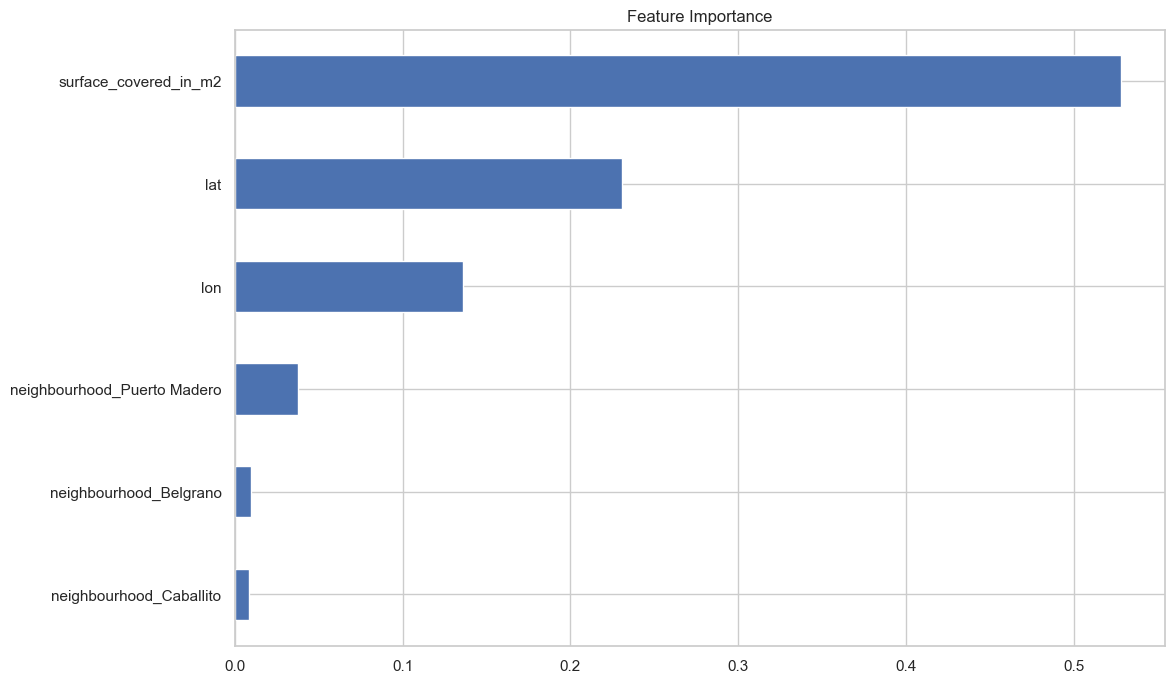

In [173]:
# Get coefficients of features
coefficients = random_forest.named_steps.randomforestregressor.feature_importances_

# Get feature names
features = random_forest.named_steps["onehotencoder"].get_feature_names()

# Create a Series of features
feat_imp = pd.Series(data=coefficients, index=features)

plot_feat_imp = feat_imp.sort_values(ascending=True).tail(6)
plot_feat_imp.plot(kind="barh", figsize=(12,8))
pl.title("Feature Importance")
pl.show()

test

In [178]:
def make_prediction(area, lat, lon, neighborhood):

    # Load the model
#     model = joblib.load(model_name)

    # Creating a dictionary for the new data
    data = {
        "lat": lat,
        "lon": lon,
        "surface_covered_in_m2": area,
        "neighbourhood": neighborhood
    }

    # Create a DataFrame
    df = pd.DataFrame(data, index=[0])
    prediction = model.predict(df).round(2)[0]
    return f"Predicted apartment price: ${prediction:.2f}"

In [180]:
make_prediction(-34.60, -38.46, 110, "Saavedra")

'Predicted apartment price: $63435.80'